In [1]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

<Figure size 800x300 with 10 Axes>

In [3]:
# Data pre-processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [5]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 31us/step - loss: 1.9438 - acc: 0.3149 - val_loss: 1.8829 - val_acc: 0.3386
Epoch 2/20
50000/50000 [==============================] - 1s 28us/step - loss: 1.8277 - acc: 0.3623 - val_loss: 1.8125 - val_acc: 0.3693
Epoch 3/20
50000/50000 [==============================] - 1s 28us/step - loss: 1.8073 - acc: 0.3720 - val_loss: 1.8007 - val_acc: 0.3714
Epoch 4/20
50000/50000 [==============================] - 1s 28us/step - loss: 1.7809 - acc: 0.3825 - val_loss: 1.8199 - val_acc: 0.3570
Epoch 5/20
50000/50000 [==============================] - 1s 28us/step - loss: 1.7638 - acc: 0.3879 - val_loss: 1.7886 - val_acc: 0.3885
Epoch 6/20
50000/50000 [==============================] - 1s 28us/step - loss: 1.7684 - acc: 0.3876 - val_loss: 1.8312 - val_acc: 0.3648
Epoch 7/20
50000/50000 [==============================] - 1s 29us/step - loss: 1.7598 - acc: 0.3907 - val_loss: 1.7981 - val_acc

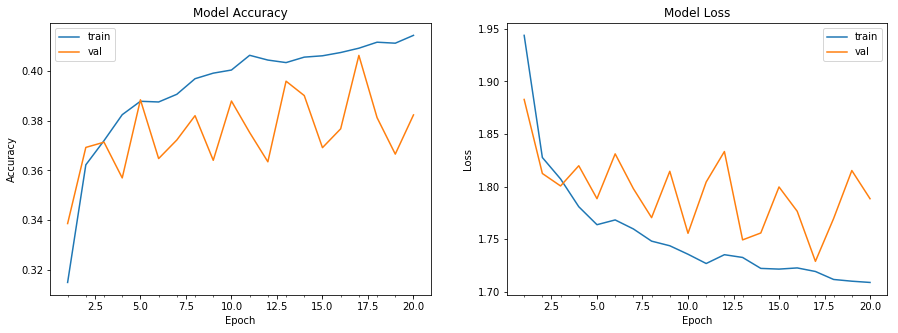

Training MLP took 33.66129994392395 seconds


In [6]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [13]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model_2 = Sequential()
model_2.add(Flatten(input_shape=(32, 32, 3)))
model_2.add(Dense(50))
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                153650    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 154,160
Trainable params: 154,160
Non-trainable params: 0
_________________________________________________________________


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 48us/step - loss: 2.0362 - acc: 0.3063 - val_loss: 1.9377 - val_acc: 0.3273
Epoch 2/20
50000/50000 [==============================] - 2s 37us/step - loss: 1.8409 - acc: 0.3556 - val_loss: 1.7798 - val_acc: 0.3713
Epoch 3/20
50000/50000 [==============================] - 2s 36us/step - loss: 1.8034 - acc: 0.3705 - val_loss: 1.8623 - val_acc: 0.3489
Epoch 4/20
50000/50000 [==============================] - 2s 36us/step - loss: 1.7844 - acc: 0.3778 - val_loss: 1.7728 - val_acc: 0.3792
Epoch 5/20
50000/50000 [==============================] - 2s 36us/step - loss: 1.7626 - acc: 0.3880 - val_loss: 1.8021 - val_acc: 0.3746
Epoch 6/20
50000/50000 [==============================] - 2s 35us/step - loss: 1.7543 - acc: 0.3902 - val_loss: 1.7419 - val_acc: 0.3933
Epoch 7/20
50000/50000 [==============================] - 2s 38us/step - loss: 1.7479 - acc: 0.3917 - val_loss: 1.7771 - val_acc

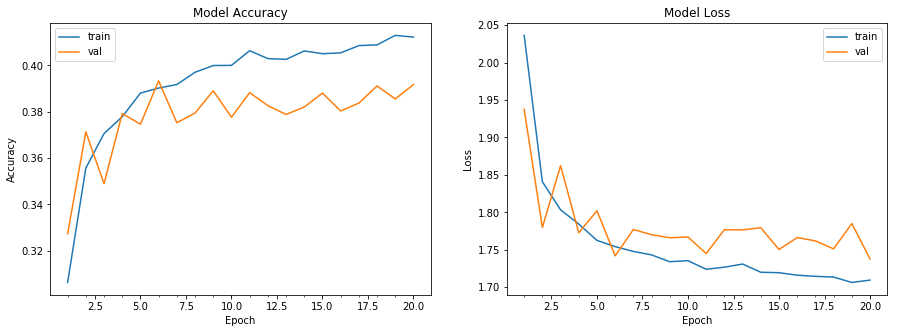

Training MLP took 40.0352897644043 seconds


In [14]:
# Training
import time
start = time.time()
history = model_2.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model_2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [8]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model_3 = Sequential()
model_3.add(Flatten(input_shape=(32, 32, 3)))
model_3.add(Dense(1536))
model_3.add(Dense(600))
model_3.add(Dense(100))
model_3.add(Dense(10))
model_3.add(Activation('softmax'))

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1536)              4720128   
_________________________________________________________________
dense_7 (Dense)              (None, 600)               922200    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               60100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 5,703,438
Trainable params: 5,703,438
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training
import time
start = time.time()
history = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model_3.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
39424/50000 [======================>.......] - ETA: 8s - loss: 14.4703 - acc: 0.0994